In [7]:

import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns


In [2]:
!pip install netcdf4

In [9]:
from datetime import datetime

import numpy as np
import pandas as pd

import netCDF4 as nc

In [10]:
## create NetCDF file
newfile = nc.Dataset('newfile.nc', 'w', format='NETCDF4')

## define dimesions
long = newfile.createDimension('longitude', size=360)
lati = newfile.createDimension('latitude', size=180)
heights = newfile.createDimension('height', size=15)
times = newfile.createDimension('time', size=None)

## define variables for storing data
lon = newfile.createVariable('lon', 'f4', dimensions='longitude')
lat = newfile.createVariable('lat', 'f4', dimensions='latitude')
height = newfile.createVariable('height', 'f4', dimensions='height')
time = newfile.createVariable('times', 'S19', dimensions='time')
temps = newfile.createVariable('temperature', 'f4', dimensions=('longitude', 'latitude', 'height', 'time'))

## generate random values
temp = np.random.randint(-40, 40, size=(360, 180, 15, 24))

date_range = pd.date_range(datetime(2019, 6, 1, 0), datetime(2019, 6, 1, 23), freq='1h')

## add data to variables
lon[:] = np.arange(-180, 180)
lat[:] = np.arange(-90, 90)
height[:] = [10, 50, 100, 150, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
temps[...] = temp
for i in range(24):
    time[i] = date_range[i].strftime('%Y-%m-%d %H:%M:%S')

## add attributes    
#add global attributes
newfile.title = 'Example of create NetCDF file using netcdf4-python'
newfile.start_time = time[i]
newfile.times = time.shape[0]
newfile.history = 'Created ' + datetime(2019, 6, 1, 0, 0, 0).strftime('%Y-%m-%d %H:%M%S')

#add local attributes to variable
lon.description = 'longitude, west is negative'
lon.units = 'degrees east'

lat.description = 'latitude, south is negative'
lat.units = 'degrees north'

time.description = 'time, unlimited dimension'
time.units = 'times since {0:s}'.format(time[0])

temps.description = 'temperature, random value generated by numpy'
temps.units = 'degree'

height.description = 'height, above ground level'
height.units = 'meters'    

## close file
newfile.close()

In [13]:
!pip install geos proj shapely

In [14]:
!pip install cartopy

     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 56.0/56.0 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.9 MB 10.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.9 MB 12.4 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.9 MB 15.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/10.9 MB 15.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.9 MB 16.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.9 MB 16.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.9 MB 15.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/10.9 MB 16.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.9 MB 16.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.7/10.9 MB 16.4 MB/s eta 0:00:0

In [16]:
!pip install palettable

   ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
   --------------------------------------- 332.3/332.3 kB 10.4 MB/s eta 0:00:00


In [17]:
# load library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from palettable.colorbrewer.diverging import RdBu_11_r 
import netCDF4 as nc

In [1]:
import geopandas as gpd
from netCDF4 import Dataset
import numpy as np
from datetime import datetime

shapefile_path = 'data/test.shp'
gdf = gpd.read_file(shapefile_path)


gdf = gdf.to_crs("EPSG:4326")


gdf = gdf[gdf.is_valid]


polygons = gdf.geometry.apply(lambda poly: np.array(poly.exterior.coords) if poly.is_valid else np.array([]))

# Determine the maximum number of vertices
max_vertices = max(len(poly) for poly in polygons if len(poly) > 0)

height_data = gdf['Height'].values

# Create a new NetCDF file
nc_file = Dataset('shapefile_to_netcdf.nc', 'w', format='NETCDF4')

# Create dimensions
nc_file.createDimension('polygons', len(gdf))
nc_file.createDimension('vertices', max_vertices)
nc_file.createDimension('coord_dim', 2)  

# Create variables
polygon_var = nc_file.createVariable('polygons', 'f4', ('polygons', 'vertices', 'coord_dim'))
height_var = nc_file.createVariable('height', 'f4', ('polygons',))

# Add data to variables
for i, poly in enumerate(polygons):
    coords = np.zeros((max_vertices, 2))
    if len(poly) > 0:
        coords[:len(poly), :] = poly
    polygon_var[i, :, :] = coords

height_var[:] = height_data

# Add attributes
nc_file.description = 'Geospatial data with height attribute'
nc_file.history = 'Created ' + datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nc_file.source = 'Generated from shapefile data'

polygon_var.units = 'degrees'
height_var.units = 'meters'

# Close the file
nc_file.close()

print("NetCDF file created successfully!")


NetCDF file created successfully!


In [27]:
!pip install netCDF4 matplotlib cartopy xarray

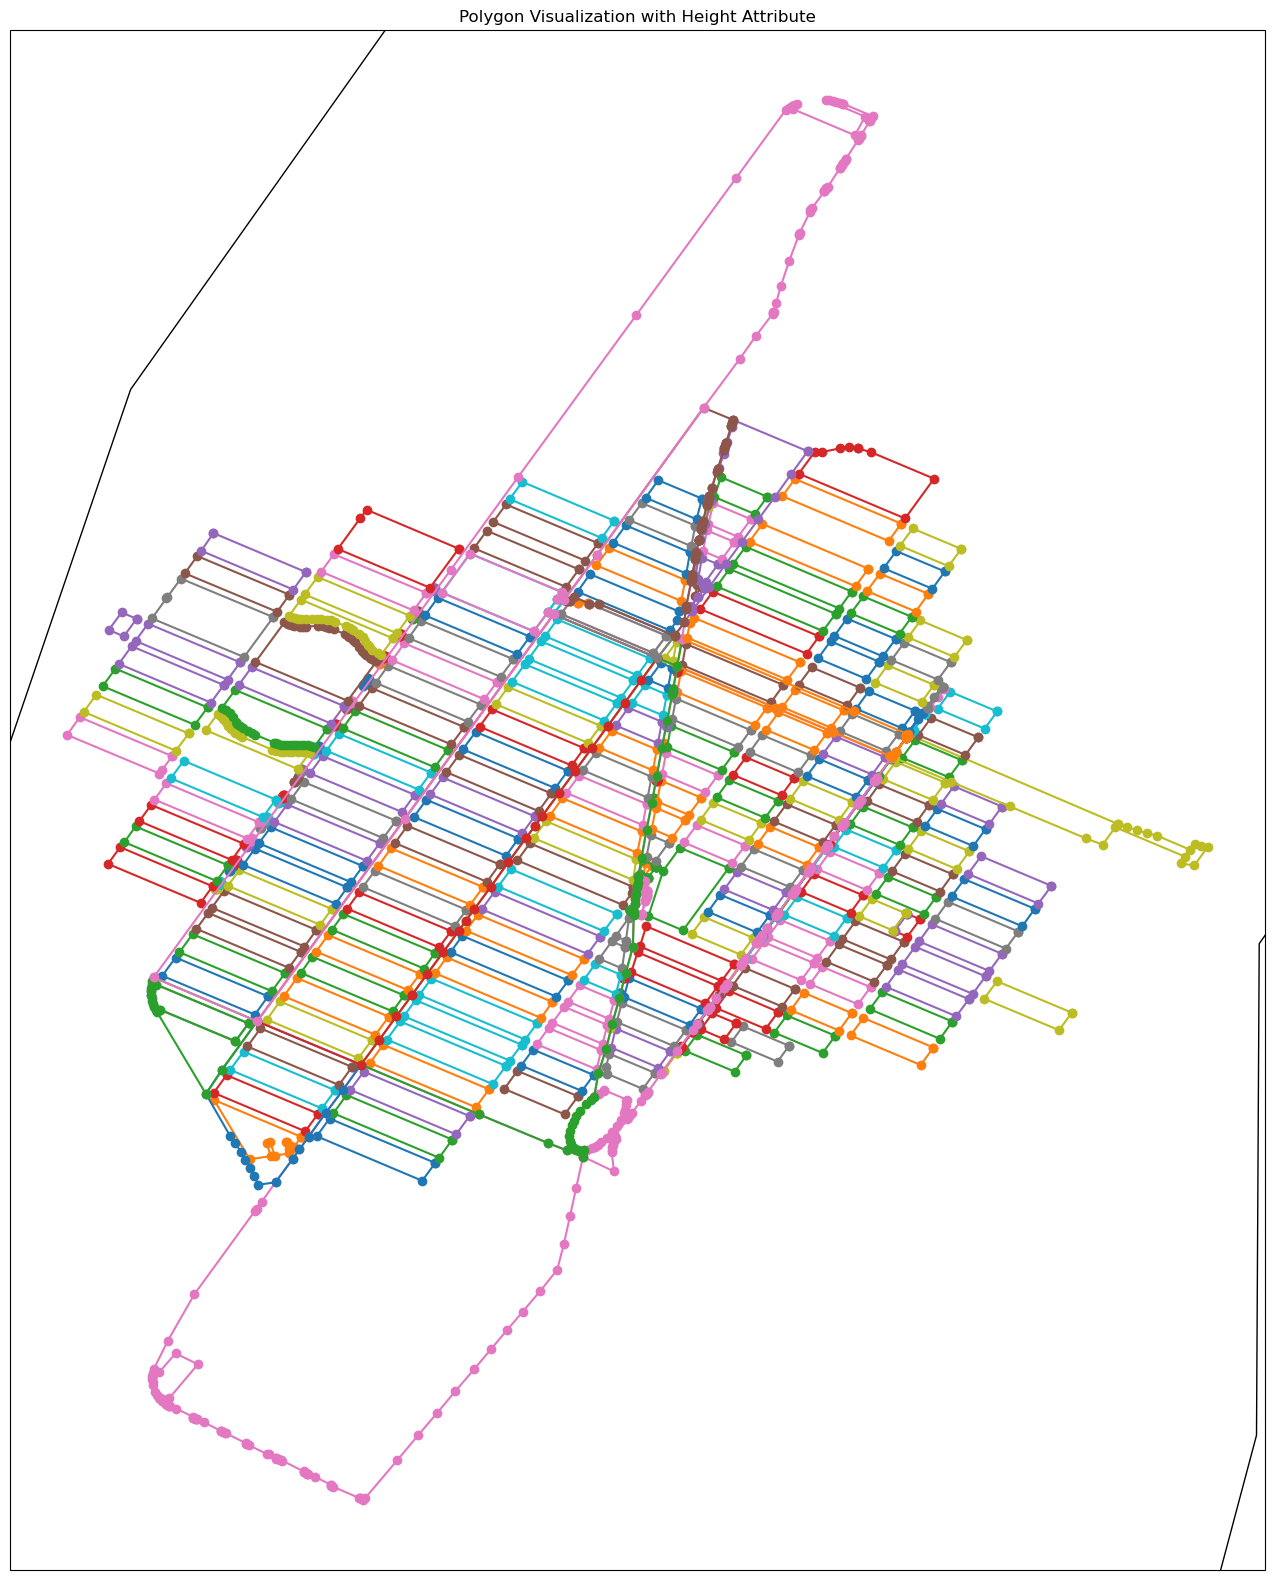

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset


nc_file = Dataset('shapefile_to_netcdf.nc', 'r')


latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
height_data = nc_file.variables['height'][:]


fig, ax = plt.subplots(figsize = (20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_title('Polygon Visualization with Height Attribute')


for i in range(len(height_data)):
    # Extract the non-zero coordinates
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]

    
    ax.plot(lons, lats, marker='o', transform=ccrs.PlateCarree(), label=f'Height: {height_data[i]:.2f} m')


plt.show()


nc_file.close()


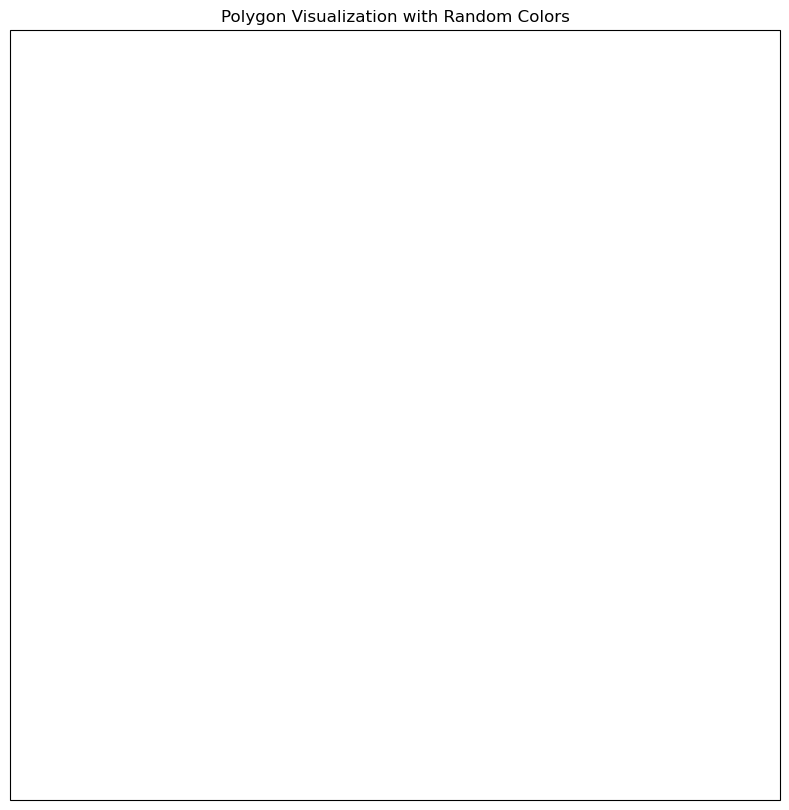

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import numpy as np
from matplotlib.collections import PolyCollection
import random

# Open the NetCDF file
nc_file = Dataset('shapefile_to_netcdf.nc', 'r')

# Extract data
latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
height_data = nc_file.variables['height'][:]

# Set up the map with a larger figure size
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_title('Polygon Visualization with Random Colors')

# Generate random colors
colors = []
polygons = []

for i in range(len(height_data)):
    # Extract the non-zero coordinates
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]

    if len(lons) > 0 and len(lats) > 0:
        polygons.append(list(zip(lons, lats)))
        # Generate a random color
        colors.append((random.random(), random.random(), random.random()))

# Create a PolyCollection
poly_collection = PolyCollection(polygons, facecolors=colors, edgecolors='black', transform=ccrs.PlateCarree())

# Add the PolyCollection to the axes
ax.add_collection(poly_collection)

# Show the plot
plt.show()

# Close the NetCDF file
nc_file.close()
